# Strings 

Strings are not like integers, floats, or booleans. A string is a **sequence**, which means it contains multiple values in a particular order. 

In this chapter, we'll learn how to access the individual values that comprise a string and utilize functions that process strings.

We'll also utilize regular expressions, a powerful tool for identifying patterns in a string and performing operations such as search and replace.
* **re.search(pattern, text)**
* **|** alternative patter(s)
* **^**
* **$**
* **re.sub(pattern, text, line**)

As an exercise, you'll have a chance to apply these tools to a word game called Wordle.

In [2]:
import sys
from pathlib import Path

current = Path.cwd()
for parent in [current, *current.parents]:
    if (parent / '_config.yml').exists():
        project_root = parent  # ← Add project root, not chapters
        break
else:
    project_root = Path.cwd().parent.parent

sys.path.insert(0, str(project_root))

from shared import thinkpython, diagram, jupyturtle
from shared.download import download

# Register as top-level modules so direct imports work in subsequent cells
sys.modules['thinkpython'] = thinkpython
sys.modules['diagram'] = diagram
sys.modules['jupyturtle'] = jupyturtle


## Python Strings

### A string is a sequence

A string is a sequence of characters. A **character** can be a letter (in almost any alphabet), a digit, a punctuation mark, or white space.

You can select a character from a string with the bracket operator.
This example statement selects character number 1 from `fruit` and
assigns it to `letter`:

In [2]:
fruit = 'banana'
letter = fruit[1]

The expression in brackets is an **index**, so called because it *indicates* which character in the sequence to select.
But the result might not be what you expect.

In [3]:
letter

'a'

The letter with index `1` is actually the second letter of the string.
An index is an offset from the beginning of the string, so the offset of the first letter is `0`.

In [4]:
fruit[0]

'b'

You can think of `'b'` as the 0th letter of `'banana'` -- pronounced "zero-eth".

The index in brackets can be a variable.

In [5]:
i = 1
fruit[i]

'a'

Or an expression that contains variables and operators.

In [6]:
fruit[i+1]

'n'

But the value of the **index** has to be an **integer** -- otherwise you get a `TypeError`.

In [7]:
%%expect TypeError

fruit[1.5]

TypeError: string indices must be integers, not 'float'

As we saw in Chapter 1, we can use the built-in function `len` to get the length of a string.

In [8]:
n = len(fruit)
n

6

To get the last letter of a string, you might be tempted to write this:

In [9]:
%%expect IndexError

fruit[n]

IndexError: string index out of range

But that causes an `IndexError` because there is no letter in `'banana'` with the index 6. Because we started counting at `0` (**0-based indexing**), the six letters are numbered `0` to `5`. To get the last character, you have to subtract `1` from `n` (**n-1**):

In [10]:
fruit[n-1]

'a'

But there's an easier way.
To get the last letter in a string, you can use a negative index, which counts backward from the end. 

In [11]:
fruit[-1]

'a'

The index `-1` selects the last letter, `-2` selects the second to last, and so on.

### String slices

A segment of a string is called a **slice**. Selecting a slice is similar to selecting a character. Slicing following the format of [**S**tart:**S**top:**S**tep] and is Start-inclusive and Stop-exclusive.

In [12]:
fruit = 'banana'
fruit[0:3]

'ban'

The operator `[n:m]` returns the part of the string from the `n`th
character to the `m`th character, including the first but excluding the second.
This behavior is counterintuitive, but it might help to imagine the indices pointing *between* the characters, as in this figure:

In [13]:
from diagram import make_binding, Element, Value

binding = make_binding("fruit", ' b a n a n a ')
elements = [Element(Value(i), None) for i in range(7)]

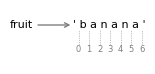

In [14]:
import matplotlib.pyplot as plt
from diagram import diagram, adjust
from matplotlib.transforms import Bbox

width, height, x, y = [1.35, 0.54, 0.23, 0.39]

ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
bboxes = [bbox]

def draw_elts(x, y, elements):
    for elt in elements:
        bbox = elt.draw(ax, x, y, draw_value=False)
        bboxes.append(bbox)

        x1 = (bbox.xmin + bbox.xmax) / 2
        y1 = bbox.ymax + 0.02
        y2 = y1 + 0.14
        handle = plt.plot([x1, x1], [y1, y2], ':', lw=0.5, color='gray')
        x += 0.105
    
draw_elts(x + 0.48, y - 0.25, elements)
bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

For example, the slice `[3:6]` selects the letters `ana`, which means that `6` is legal as part of a slice, but not legal as an index.


If you omit the first index, the slice starts at the beginning of the string.

In [15]:
fruit[:3]

'ban'

If you omit the second index, the slice goes to the end of the string:

In [16]:
fruit[3:]

'ana'

If the first index is greater than or equal to the second, the result is an **empty string**, represented by two quotation marks:

In [17]:
fruit[3:3]

''

In [18]:
fruit[0:-1]     ### all but the last letter: banan
fruit[-2:]      ### the last two letters: na
fruit[0:-1:2]   ### step is 2, so you get bnn

'bnn'

An empty string contains no characters and has length 0.

Continuing this example, what do you think `fruit[:]` means? Try it and
see.

In [19]:
fruit[:]

'banana'

### Strings are immutable

It is tempting to use the `[]` operator on the left side of an
assignment, with the intention of changing a character in a string, like this:

In [20]:
%%expect TypeError

greeting = 'Hello, world!'
greeting[0] = 'J'

TypeError: 'str' object does not support item assignment

The result is a `TypeError`.
In the error message, the "object" is the string and the "item" is the character
we tried to assign.
For now, an **object** is the same thing as a value, but we will refine that definition later.

The reason for this error is that strings are **immutable**, which means you can't change an existing string.
The best you can do is create a new string that is a variation of the original.

In [21]:
new_greeting = 'J' + greeting[1:]     ### "+" is concatenate here
new_greeting

'Jello, world!'

This example concatenates a new first letter onto a slice of `greeting`.
It has no effect on the original string.

In [22]:
greeting

'Hello, world!'

### String comparison

The relational operators work on strings. To see if two strings are equal, we can use the `==` operator.

String comparisons are based on the ASCII code table. As you can see, each character has a decimal number that string comparison uses to compare strings.

<table border="1">

<thead>
<tr>
<th style="max-width:30px;">Dec</th>
<th>Chr</th>
<th></th>
<th style="max-width:30px;">Dec</th>
<th>Chr</th>
<th></th>
<th style="max-width:30px;">Dec</th>
<th>Chr</th>
<th></th>
<th style="max-width:30px;">Dec</th>
<th>Chr</th>
<th></th>
<th style="max-width:30px;">Dec</th>
<th>Chr</th>
</tr>
</thead>

<tbody>

<tr>
<td>0</td>
<td class="greycell">NUL</td>
<td class="borderright"></td>
<td>26</td>
<td class="greycell">SUB</td>
<td class="borderright"></td>
<td>52</td>
<td class="boldred">4</td>
<td class="borderright"></td>
<td>78</td>
<td class="boldred">N</td>
<td class="borderright"></td>
<td>104</td>
<td class="boldred">h</td>
</tr>

<tr>
<td>1</td>
<td class="greycell">SOH</td>
<td class="borderright"></td>
<td>27</td>
<td class="greycell">ESC</td>
<td class="borderright"></td>
<td>53</td>
<td class="boldred">5</td>
<td class="borderright"></td>
<td>79</td>
<td class="boldred">O</td>
<td class="borderright"></td>
<td>105</td>
<td class="boldred">i</td>
</tr>

<tr>
<td>2</td>
<td class="greycell">STX</td>
<td class="borderright"></td>
<td>28</td>
<td class="greycell">FS</td>
<td class="borderright"></td>
<td>54</td>
<td class="boldred">6</td>
<td class="borderright"></td>
<td>80</td>
<td class="boldred">P</td>
<td class="borderright"></td>
<td>106</td>
<td class="boldred">j</td>
</tr>

<tr>
<td>3</td>
<td class="greycell">ETX</td>
<td class="borderright"></td>
<td>29</td>
<td class="greycell">GS</td>
<td class="borderright"></td>
<td>55</td>
<td class="boldred">7</td>
<td class="borderright"></td>
<td>81</td>
<td class="boldred">Q</td>
<td class="borderright"></td>
<td>107</td>
<td class="boldred">k</td>
</tr>

<tr>
<td>4</td>
<td class="greycell">EOT</td>
<td class="borderright"></td>
<td>30</td>
<td class="greycell">RS</td>
<td class="borderright"></td>
<td>56</td>
<td class="boldred">8</td>
<td class="borderright"></td>
<td>82</td>
<td class="boldred">R</td>
<td class="borderright"></td>
<td>108</td>
<td class="boldred">l</td>
</tr>

<tr>
<td>5</td>
<td class="greycell">ENQ</td>
<td class="borderright"></td>
<td>31</td>
<td class="greycell">US</td>
<td class="borderright"></td>
<td>57</td>
<td class="boldred">9</td>
<td class="borderright"></td>
<td>83</td>
<td class="boldred">S</td>
<td class="borderright"></td>
<td>109</td>
<td class="boldred">m</td>
</tr>

<tr>
<td>6</td>
<td class="greycell">ACK</td>
<td class="borderright"></td>
<td>32</td>
<td class="boldred"></td>
<td class="borderright"></td>
<td>58</td>
<td class="boldred">:</td>
<td class="borderright"></td>
<td>84</td>
<td class="boldred">T</td>
<td class="borderright"></td>
<td>110</td>
<td class="boldred">n</td>
</tr>

<tr>
<td>7</td>
<td class="greycell">BEL</td>
<td class="borderright"></td>
<td>33</td>
<td class="boldred">!</td>
<td class="borderright"></td>
<td>59</td>
<td class="boldred">;</td>
<td class="borderright"></td>
<td>85</td>
<td class="boldred">U</td>
<td class="borderright"></td>
<td>111</td>
<td class="boldred">o</td>
</tr>

<tr>
<td>8</td>
<td class="greycell">BS</td>
<td class="borderright"></td>
<td>34</td>
<td class="boldred">"</td>
<td class="borderright"></td>
<td>60</td>
<td class="boldred">&lt;</td>
<td class="borderright"></td>
<td>86</td>
<td class="boldred">V</td>
<td class="borderright"></td>
<td>112</td>
<td class="boldred">p</td>
</tr>

<tr>
<td>9</td>
<td class="greycell">HT</td>
<td class="borderright"></td>
<td>35</td>
<td class="boldred">#</td>
<td class="borderright"></td>
<td>61</td>
<td class="boldred">=</td>
<td class="borderright"></td>
<td>87</td>
<td class="boldred">W</td>
<td class="borderright"></td>
<td>113</td>
<td class="boldred">q</td>
</tr>

<tr>
<td>10</td>
<td class="greycell">LF</td>
<td class="borderright"></td>
<td>36</td>
<td class="boldred">$</td>
<td class="borderright"></td>
<td>62</td>
<td class="boldred">&gt;</td>
<td class="borderright"></td>
<td>88</td>
<td class="boldred">X</td>
<td class="borderright"></td>
<td>114</td>
<td class="boldred">r</td>
</tr>

<tr>
<td>11</td>
<td class="greycell">VT</td>
<td class="borderright"></td>
<td>37</td>
<td class="boldred">%</td>
<td class="borderright"></td>
<td>63</td>
<td class="boldred">?</td>
<td class="borderright"></td>
<td>89</td>
<td class="boldred">Y</td>
<td class="borderright"></td>
<td>115</td>
<td class="boldred">s</td>
</tr>

<tr>
<td>12</td>
<td class="greycell">FF</td>
<td class="borderright"></td>
<td>38</td>
<td class="boldred">&amp;</td>
<td class="borderright"></td>
<td>64</td>
<td class="boldred">@</td>
<td class="borderright"></td>
<td>90</td>
<td class="boldred">Z</td>
<td class="borderright"></td>
<td>116</td>
<td class="boldred">t</td>
</tr>

<tr>
<td>13</td>
<td class="greycell">CR</td>
<td class="borderright"></td>
<td>39</td>
<td class="boldred">'</td>
<td class="borderright"></td>
<td>65</td>
<td class="boldred">A</td>
<td class="borderright"></td>
<td>91</td>
<td class="boldred">[</td>
<td class="borderright"></td>
<td>117</td>
<td class="boldred">u</td>
</tr>

<tr>
<td>14</td>
<td class="greycell">SO</td>
<td class="borderright"></td>
<td>40</td>
<td class="boldred">(</td>
<td class="borderright"></td>
<td>66</td>
<td class="boldred">B</td>
<td class="borderright"></td>
<td>92</td>
<td class="boldred">\</td>
<td class="borderright"></td>
<td>118</td>
<td class="boldred">v</td>
</tr>

<tr>
<td>15</td>
<td class="greycell">SI</td>
<td class="borderright"></td>
<td>41</td>
<td class="boldred">)</td>
<td class="borderright"></td>
<td>67</td>
<td class="boldred">C</td>
<td class="borderright"></td>
<td>93</td>
<td class="boldred">]</td>
<td class="borderright"></td>
<td>119</td>
<td class="boldred">w</td>
</tr>

<tr>
<td>16</td>
<td class="greycell">DLE</td>
<td class="borderright"></td>
<td>42</td>
<td class="boldred">*</td>
<td class="borderright"></td>
<td>68</td>
<td class="boldred">D</td>
<td class="borderright"></td>
<td>94</td>
<td class="boldred">^</td>
<td class="borderright"></td>
<td>120</td>
<td class="boldred">x</td>
</tr>

<tr>
<td>17</td>
<td class="greycell">DC1</td>
<td class="borderright"></td>
<td>43</td>
<td class="boldred">+</td>
<td class="borderright"></td>
<td>69</td>
<td class="boldred">E</td>
<td class="borderright"></td>
<td>95</td>
<td class="boldred">_</td>
<td class="borderright"></td>
<td>121</td>
<td class="boldred">y</td>
</tr>

<tr>
<td>18</td>
<td class="greycell">DC2</td>
<td class="borderright"></td>
<td>44</td>
<td class="boldred">,</td>
<td class="borderright"></td>
<td>70</td>
<td class="boldred">F</td>
<td class="borderright"></td>
<td>96</td>
<td class="boldred">`</td>
<td class="borderright"></td>
<td>122</td>
<td class="boldred">z</td>
</tr>

<tr>
<td>19</td>
<td class="greycell">DC3</td>
<td class="borderright"></td>
<td>45</td>
<td class="boldred">-</td>
<td class="borderright"></td>
<td>71</td>
<td class="boldred">G</td>
<td class="borderright"></td>
<td>97</td>
<td class="boldred">a</td>
<td class="borderright"></td>
<td>123</td>
<td class="boldred">{</td>
</tr>

<tr>
<td>20</td>
<td class="greycell">DC4</td>
<td class="borderright"></td>
<td>46</td>
<td class="boldred">.</td>
<td class="borderright"></td>
<td>72</td>
<td class="boldred">H</td>
<td class="borderright"></td>
<td>98</td>
<td class="boldred">b</td>
<td class="borderright"></td>
<td>124</td>
<td class="boldred">|</td>
</tr>

<tr>
<td>21</td>
<td class="greycell">NAK</td>
<td class="borderright"></td>
<td>47</td>
<td class="boldred">/</td>
<td class="borderright"></td>
<td>73</td>
<td class="boldred">I</td>
<td class="borderright"></td>
<td>99</td>
<td class="boldred">c</td>
<td class="borderright"></td>
<td>125</td>
<td class="boldred">}</td>
</tr>

<tr>
<td>22</td>
<td class="greycell">SYN</td>
<td class="borderright"></td>
<td>48</td>
<td class="boldred">0</td>
<td class="borderright"></td>
<td>74</td>
<td class="boldred">J</td>
<td class="borderright"></td>
<td>100</td>
<td class="boldred">d</td>
<td class="borderright"></td>
<td>126</td>
<td class="boldred">~</td>
</tr>

<tr>
<td>23</td>
<td class="greycell">ETB</td>
<td class="borderright"></td>
<td>49</td>
<td class="boldred">1</td>
<td class="borderright"></td>
<td>75</td>
<td class="boldred">K</td>
<td class="borderright"></td>
<td>101</td>
<td class="boldred">e</td>
<td class="borderright"></td>
<td>127</td>
<td class="boldred">DEL</td>
</tr>

<tr>
<td>24</td>
<td class="greycell">CAN</td>
<td class="borderright"></td>
<td>50</td>
<td class="boldred">2</td>
<td class="borderright"></td>
<td>76</td>
<td class="boldred">L</td>
<td class="borderright"></td>
<td>102</td>
<td class="boldred">f</td>
<td></td>
<td></td>
<td></td>
</tr>

<tr>
<td>25</td>
<td class="greycell">EM</td>
<td class="borderright"></td>
<td>51</td>
<td class="boldred">3</td>
<td class="borderright"></td>
<td>77</td>
<td class="boldred">M</td>
<td class="borderright"></td>
<td>103</td>
<td class="boldred">g</td>
<td></td>
<td></td>
<td></td>
</tr>

</tbody>


</table>

In [23]:
### check out the comparisons here:

print("A" < 'a')
print("a" < 'banana')
print('Pineapple' > 'pineapple')
print('Pineapple' > 'banana')

True
True
False
False


In [24]:
word = 'banana'

if word == 'banana':
    print('All right, banana.')

All right, banana.


Other relational operations are useful for putting words in alphabetical
order:

In [25]:
def compare_word(word):
    if word < 'banana':
        print(word, 'comes before banana.')
    elif word > 'banana':
        print(word, 'comes after banana.')
    else:
        print('All right, banana.')

In [26]:
compare_word('apple')

apple comes before banana.


Python does not handle uppercase and lowercase letters the same way
people do. All the uppercase letters come before all the lowercase
letters, so:

In [27]:
compare_word('Pineapple')

Pineapple comes before banana.


To solve this problem, we can convert strings to a standard format, such as all lowercase, before performing the comparison.
Keep that in mind if you have to defend yourself against a man armed with a Pineapple.

### Looping Through Lists

You can use a `for` statement to loop through the elements of a list.

In [ ]:
fruits = ['apple', 'banana', 'cherry']

for fruit in fruits:
    print(fruit)

In [ ]:
for fruit in fruits:
    print(fruit)

apple
banana
cherry


For example, after using `split` to make a list of words, we can use `for` to loop through them.

In [ ]:
s = 'pining for the fjords'

for word in s.split():
    print(word)

pining
for
the
fjords


A `for` loop over an empty list never runs the indented statements.

In [ ]:
for x in []:
    print('This never happens.')

In [ ]:
### EXERCISE: Looping Through Lists
numbers = [10, 20, 30, 40, 50]
# 1. Loop through the numbers and print each number multiplied by 2
# 2. Create a new list containing only numbers greater than 25
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
numbers = [10, 20, 30, 40, 50]

print("Numbers multiplied by 2:")
for num in numbers:
    print(num * 2)

greater_than_25 = []
for num in numbers:
    if num > 25:
        greater_than_25.append(num)
        
print(f"\nNumbers > 25: {greater_than_25}")

### String methods

Strings provide methods that perform a variety of useful operations. 
A method is similar to a function -- it takes arguments and returns a value -- but the syntax is different.
For example, the method `upper` takes a string and returns a new string with all uppercase letters.

Instead of the function syntax `upper(word)`, it uses the method syntax `word.upper()`.

In [28]:
word = 'banana'
new_word = word.upper()
new_word

'BANANA'

This use of the dot operator specifies the name of the method, `upper`, and the name of the string to apply the method to, `word`.
The empty parentheses indicate that this method takes no arguments.

A method call is called an **invocation**; in this case, we would say that we are invoking `upper` on `word`.

### Sorting Lists

Python provides a built-in function called `sorted` that sorts the elements of a list.

In [ ]:
scramble = ['c', 'a', 'b']
sorted(scramble)

['a', 'b', 'c']

The original list is unchanged.

In [ ]:
scramble

['c', 'a', 'b']

`sorted` works with any kind of sequence, not just lists. So we can sort the letters in a string like this.

In [ ]:
sorted('letters')

['e', 'e', 'l', 'r', 's', 't', 't']

The result is a list.
To convert the list to a string, we can use `join`.

In [ ]:
''.join(sorted('letters'))

'eelrstt'

With an empty string as the delimiter, the elements of the list are joined with nothing between them.

In [ ]:
### EXERCISE: Sorting Lists
scores = [85, 92, 78, 90, 88]
names = ['Charlie', 'Alice', 'Bob']
# 1. Sort the scores in descending order (highest first)
# 2. Sort the names alphabetically and join them with commas
### Your code starts here:



### Your code ends here.

In [ ]:
# Solution
scores = [85, 92, 78, 90, 88]
names = ['Charlie', 'Alice', 'Bob']

sorted_scores = sorted(scores, reverse=True)
sorted_names = sorted(names)
names_joined = ", ".join(sorted_names)

print(f"Scores (descending): {sorted_scores}")
print(f"Names (alphabetically): {names_joined}")

(section_docstring)=
## Docstrings

A **docstring** is a string at the beginning of a function that explains the interface ("doc" is short for "documentation").
Here is an example:

In [ ]:
def polyline(n, length, angle):
    """Draws line segments with the given length and angle between them.
    
    n: integer number of line segments
    length: length of the line segments
    angle: angle between segments (in degrees)
    """    
    for i in range(n):
        forward(length)
        left(angle)

By convention, docstrings are triple-quoted strings, also known as **multiline strings** because the triple quotes allow the string to span more than one line.

A docstring should:

* Explain concisely what the function does, without getting into the details of how it works,

* Explain what effect each parameter has on the behavior of the function, and

* Indicate what type each parameter should be, if it is not obvious.

Writing this kind of documentation is an important part of interface design.
A well-designed interface should be simple to explain; if you have a hard time explaining one of your functions, maybe the interface could be improved.

## Regular expressions

If we know exactly what sequence of characters we're looking for, we can use the **`in`** operator to find it and the `replace` method to replace it.
However, there is another tool, called a **regular expression**, that can also perform these operations—and a lot more.

To demonstrate, I'll start with a simple example and we'll work our way up.
Suppose, again, that we want to find all lines that contain a particular word.
For a change, let's look for references to the titular character of the book, Count Dracula.
Here's a line that mentions him.

In [45]:
text = "I am Dracula; and I bid you welcome, Mr. Harker, to my house."

And here's the **pattern** we'll use to search.

In [46]:
pattern = 'Dracula'

A Python module called **`re`** provides functions related to regular expressions.
We can import it like this and use the `search` function to check whether the pattern appears in the text.

In [47]:
import re

result = re.search(pattern, text)     ### pattern: Dracula; text: the line
result

<re.Match object; span=(5, 12), match='Dracula'>

If the pattern appears in the text, `search` returns a `Match` object that contains the results of the search.
Among other information, it has a variable named `string` that contains the text that was searched.

In [48]:
result.string

'I am Dracula; and I bid you welcome, Mr. Harker, to my house.'

It also provides a method called `group` that returns the part of the text that **match**ed the pattern.

In [49]:
result.group()

'Dracula'

And it provides a method called `span` that returns the index in the text where the pattern starts and ends.

In [50]:
result.span()

(5, 12)

If the pattern doesn't appear in the text, the return value from `search` is `None`.

In [51]:
result = re.search('Count', text)
print(result)

None


So we can check whether the search was successful by checking whether the result is `None`.

In [52]:
result == None

True

Putting all that together, here's a function that loops through the lines in the book until it finds one that matches the given pattern, and returns the `Match` object.

In [53]:
def find_first(pattern):
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result != None:
            return result

We can use it to find the first mention of a character.

In [54]:
result = find_first('Harker')
result.string

'CHAPTER I. Jonathan Harker’s Journal\n'

For this example, we didn't have to use regular expressions -- we could have done the same thing more easily with the `in` operator.
But regular expressions can do things the `in` operator cannot.

For example, if the pattern includes the vertical bar character, `'|'`, it can match either the sequence on the left or the sequence on the right.
Suppose we want to find the first mention of Mina Murray in the book, but we are not sure whether she is referred to by first name or last.
We can use the following pattern, which matches either name.

In [55]:
pattern = 'Mina|Murray'
result = find_first(pattern)
result.string

'CHAPTER V. Letters—Lucy and Mina\n'

We can use a pattern like this to see how many times a character is mentioned by either name.
Here's a function that loops through the book and counts the number of lines that match the given pattern.

In [56]:
def count_matches(pattern):
    count = 0
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result != None:
            count += 1
    return count

Now let's see how many times Mina is mentioned.

In [57]:
count_matches('Mina|Murray')

229

The special character `'^'` matches the beginning of a string, so we can find a line that starts with a given pattern.

In [58]:
result = find_first('^Dracula')
result.string

'Dracula, jumping to his feet, said:--\n'

And the special character `'$'` matches the end of a string, so we can find a line that ends with a given pattern (ignoring the newline at the end).

In [59]:
result = find_first('Harker$')
result.string

'by five o’clock, we must start off; for it won’t do to leave Mrs. Harker\n'

### String substitution

Bram Stoker was born in Ireland, and when *Dracula* was published in 1897, he was living in England.
So we would expect him to use the British spelling of words like "centre" and "colour".
To check, we can use the following pattern, which matches either "centre" or the American spelling "center".

In [60]:
pattern = 'cent(er|re)'

In this pattern, the parentheses enclose the part of the pattern the vertical bar applies to.
So this pattern matches a sequence that starts with `'cent'` and ends with either `'er'` or `'re'`.

In [61]:
result = find_first(pattern)
result.string

'horseshoe of the Carpathians, as if it were the centre of some sort of\n'

As expected, he used the British spelling.

We can also check whether he used the British spelling of "colour".
The following pattern uses the special character `'?'`, which means that the previous character is optional.

In [62]:
pattern = 'colou?r'

This pattern matches either "colour" with the `'u'` or "color" without it.

In [63]:
result = find_first(pattern)
line = result.string
line

'undergarment with long double apron, front, and back, of coloured stuff\n'

Again, as expected, he used the British spelling.

Now suppose we want to produce an edition of the book with American spellings.
We can use the `sub` function in the `re` module, which does **string substitution**.

In [64]:
re.sub(pattern, 'color', line)

'undergarment with long double apron, front, and back, of colored stuff\n'

The first argument is the pattern we want to find and replace, the second is what we want to replace it with, and the third is the string we want to search.
In the result, you can see that "colour" has been replaced with "color".

In [65]:
# I used this function to search for lines to use as examples

def all_matches(pattern):
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result:
            print(line.strip())

In [66]:
### e.g., 

all_matches('weather')

weather. As I stood, the driver jumped again into his seat and shook the
weatherworn, was still complete; but it was evidently many a day since
it is a buoy with a bell, which swings in bad weather, and sends in a
am awakened by her moving about the room. Fortunately, the weather is so
learn the weather signs. To-day is a grey day, and the sun as I write is
experienced here, with results both strange and unique. The weather had
kept watch on weather signs from the East Cliff, foretold in an emphatic
_22 July_.--Rough weather last three days, and all hands busy with
weather. Passed Gibralter and out through Straits. All well.
and entering on the Bay of Biscay with wild weather ahead, and yet last
weather influences as we know that the Count can bring to bear; and if
that I am fully armed as there may be wolves; the weather is getting


In [67]:
# Here's the pattern I used (which uses some features we haven't seen)

# names = r'(?<!\.\s)[A-Z][a-zA-Z]+'

# all_matches(names)

## Debugging

When you are reading and writing files, debugging can be tricky.
If you are working in a Jupyter notebook, you can use **shell commands** to help.
For example, to display the first few lines of a file, you can use the command `!head`, like this:

In [68]:
!head pg345_cleaned.txt





                                DRACULA

                                  _by_

                              Bram Stoker



The initial exclamation point, `!`, indicates that this is a shell command, which is not part of Python.
To display the last few lines, you can use `!tail`.

In [69]:
!tail pg345_cleaned.txt


THE VALLEY OF HEADSTRONG MEN

_Ask for Complete free list of G. & D. Popular Copyrighted Fiction_

GROSSET & DUNLAP, _Publishers_, NEW YORK






When you are working with large files, debugging can be difficult because there might be too much output to check by hand.
A good debugging strategy is to start with just part of the file, get the program working, and then run it with the whole file.

To make a small file that contains part of a larger file, we can use `!head` again with the redirect operator, `>`, which indicates that the results should be written to a file rather than displayed.

In [70]:
!head pg345_cleaned.txt > pg345_cleaned_10_lines.txt

By default, `!head` reads the first 10 lines, but it takes an optional argument that indicates the number of lines to read.

In [71]:
!head -100 pg345_cleaned.txt > pg345_cleaned_100_lines.txt

This shell command reads the first 100 lines from `pg345_cleaned.txt` and writes them to a file called `pg345_cleaned_100_lines.txt`.

Note: The shell commands `!head` and `!tail` are not available on all operating systems.
If they don't work for you, we can write similar functions in Python.
See the first exercise at the end of this chapter for suggestions.

## Practical Application

Let's apply what we've learned to a real-world task: building and searching a word list.

### Making a Word List

In the previous chapter, we read the file `words.txt` and searched for words with certain properties, like using the letter `e`.
But we read the entire file many times, which is not efficient.
It is better to read the file once and put the words in a list.
The following loop shows how.

In [3]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

In [ ]:
word_list = []

for line in open('words.txt'):
    word = line.strip()
    word_list.append(word)
    
len(word_list)

113783

Before the loop, `word_list` is initialized with an empty list.
Each time through the loop, the `append` method adds a word to the end.
When the loop is done, there are more than 113,000 words in the list.

Another way to do the same thing is to use `read` to read the entire file into a string.

In [ ]:
string = open('words.txt').read()
len(string)

1016511

The result is a single string with more than a million characters.
We can use the `split` method to split it into a list of words.

In [ ]:
word_list = string.split()
len(word_list)

113783

Evaluating the variable `word_list` in Jupyter Notebook will give you the whole list, which is very long, so let us use a for loop to take a look at the first 10 elements:

In [ ]:
for i in range(10):
    print(word_list[i])

aa
aah
aahed
aahing
aahs
aal
aalii
aaliis
aals
aardvark


And we always want to know the data type of our data:

In [ ]:
print(type(word_list))

<class 'list'>


Now, to check whether a string appears in the list, we can use the `in` operator.
For example, `'demotic'` is in the list.

In [ ]:
'demotic' in word_list

True

But `'contrafibularities'` is not.

In [ ]:
'contrafibularities' in word_list

False

And I have to say, I'm anaspeptic about it.